# Duplicate Quora Question Pairs

In [73]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [74]:
import tarfile

file_path = '/content/train.tar.xz'
extract_path = '/content/'  # Change to your desired folder

with tarfile.open(file_path, 'r:xz') as tar:
    tar.extractall(path=extract_path)

print("Extraction complete!")


Extraction complete!


In [75]:
# load the dataset
df = pd.read_csv('/content/train.csv')
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [76]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
312435,312435,436873,436874,Would drinking milk flush weed out of my syste...,How does Niacin work to flush your system of w...,0
292671,292671,265874,414311,How do I sleep fast?,How can I fall asleep fast?,1
313386,313386,71363,76613,What sort of questions do HKU and HKUST ask in...,What are some smart answers given to an interv...,0
117758,117758,191555,93433,How can I see the answer for my question that ...,How do I see all the Quora questions I've aske...,0
105570,105570,174068,174069,What is Web Marketing? I want to learn interne...,What's the best way to get started in internet...,1
379061,379061,510560,510561,Are there any women who aren't black-owned?,"I'm a gay from Morocco, I was wondering, if I ...",0
191184,191184,290456,290457,Can an allotransplant in Russia help cure macu...,Do Tums help cure a stomach ache?,0
201319,201319,41196,73054,What does it mean if my dog is throwing up whi...,Why is my puppy throwing up yellow liquid?,1
66235,66235,114832,114833,Why are people so fascinated by INTJs?,How do non-INTJ feel about INTJs?,0
204808,204808,35331,60328,What are some of the famous conspiracy theorie...,Are any of the conspiracy theories actually true?,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [78]:
# missing values
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


In [79]:
# remove the missing values
df = df.dropna()

In [80]:
# duplicate rows
df.duplicated().sum()

np.int64(0)

is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

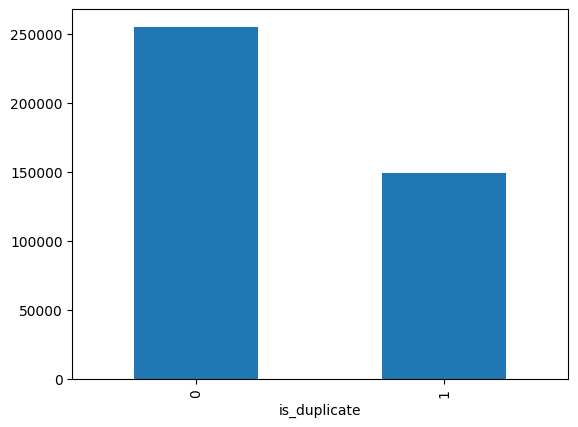

In [81]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

is_duplicate
0    255024
1    149263
Name: count, dtype: int64
is_duplicate
0    63.079941
1    36.920059
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

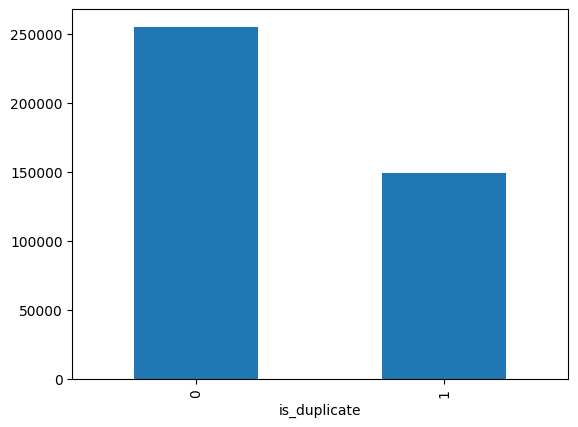

In [82]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [83]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537929
Number of questions getting repeated 111778


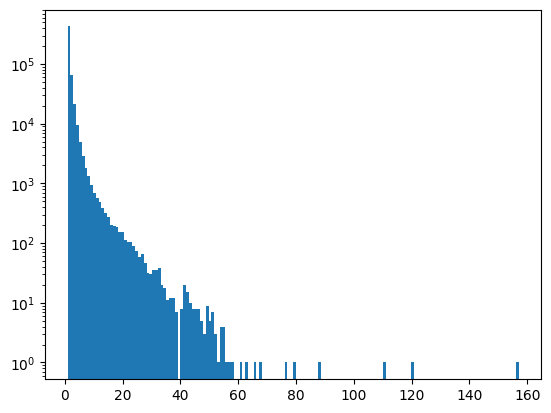

In [84]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# Feature Engineering

In [85]:
# create new features , q1_len and q2_len
df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

In [86]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39


In [87]:
# create new features , q1_num_words and q2_num_words
df['q1_num_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
df['q2_num_words'] = df['question2'].apply(lambda row: len(row.split(" ")))
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


In [88]:
# create a new feature , num_common_words in q1 and q2
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [89]:
df['num_common_words'] = df.apply(common_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2


In [90]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [91]:

df['word_total'] = df.apply(total_words, axis=1)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,word_total
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20


In [92]:
df['word_share'] = round(df['num_common_words']/df['word_total'],2)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,word_total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20,0.20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19,0.00
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20,0.10


minimum characters 1
maximum characters 623
average num of characters 59


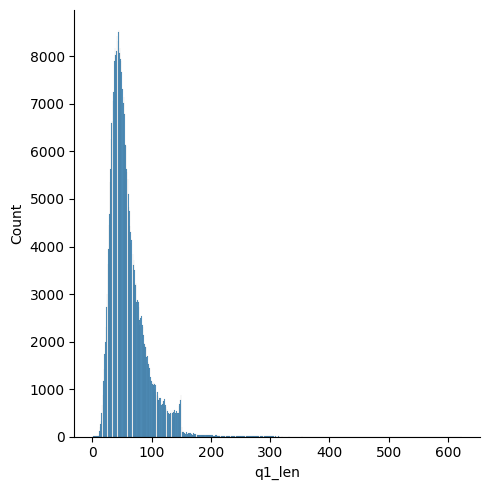

In [93]:
# Analysis of features
sns.displot(df['q1_len'])
print('minimum characters',df['q1_len'].min())
print('maximum characters',df['q1_len'].max())
print('average num of characters',int(df['q1_len'].mean()))

minimum characters 1
maximum characters 1169
average num of characters 60


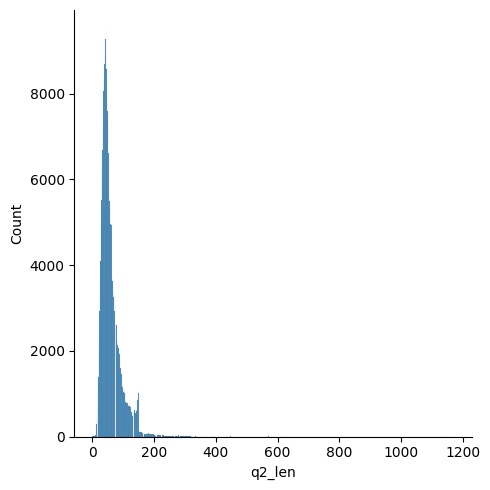

In [94]:
sns.displot(df['q2_len'])
print('minimum characters',df['q2_len'].min())
print('maximum characters',df['q2_len'].max())
print('average num of characters',int(df['q2_len'].mean()))

minimum words 1
maximum words 237
average num of words 11


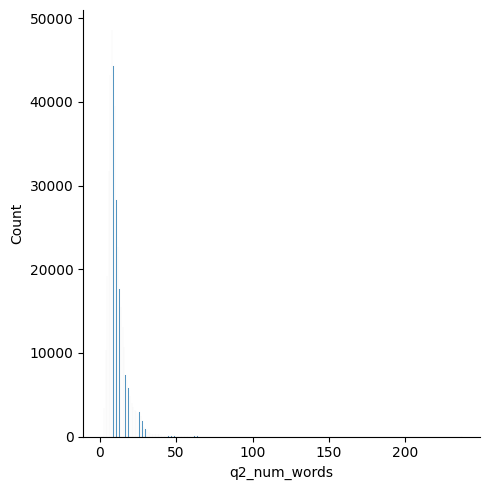

In [95]:
sns.displot(df['q2_num_words'])
print('minimum words',df['q2_num_words'].min())
print('maximum words',df['q2_num_words'].max())
print('average num of words',int(df['q2_num_words'].mean()))

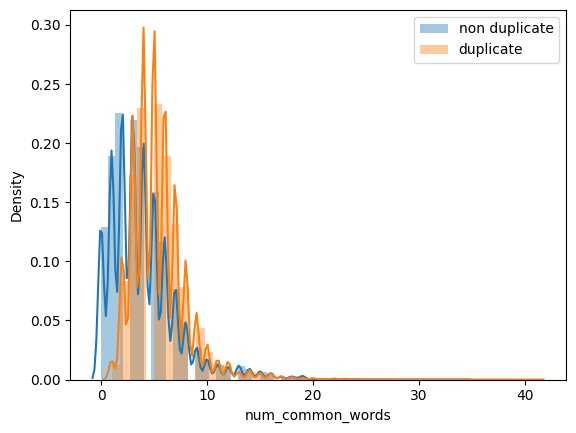

In [96]:
# common words
sns.distplot(df[df['is_duplicate'] == 0]['num_common_words'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['num_common_words'],label='duplicate')
plt.legend()
plt.show()

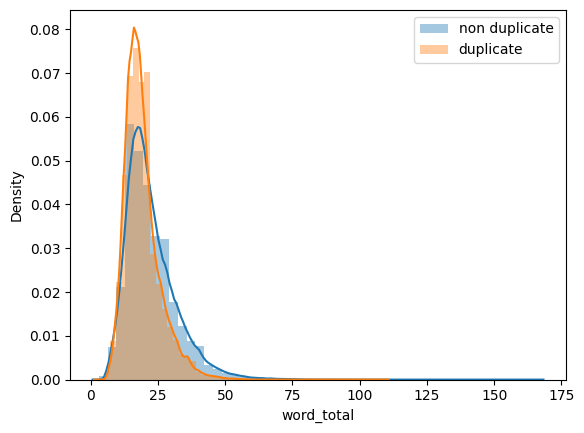

In [97]:
# total words
sns.distplot(df[df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

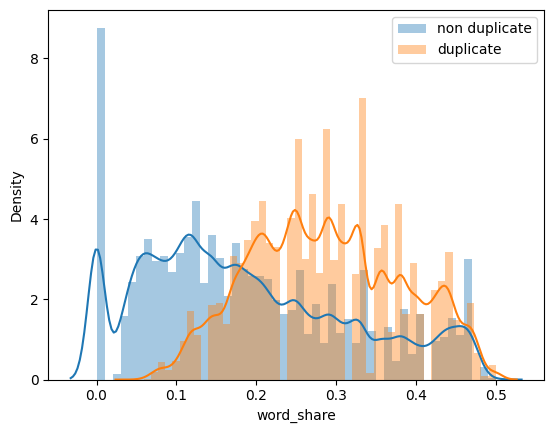

In [98]:
# word share
sns.distplot(df[df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df[df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

# Model building steps

In [99]:
import re
from bs4 import BeautifulSoup


In [100]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [101]:
df['question1'] = df['question1'].apply(preprocess)
df['question2'] = df['question2'].apply(preprocess)

In [102]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
q1_tfidf = tfidf.fit_transform(df['question1'])
q2_tfidf = tfidf.transform(df['question2'])


In [103]:
q1_vec = q1_tfidf.copy()
q2_vec = q2_tfidf.copy()

In [104]:
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,2))
# q1_vec = vectorizer.fit_transform(df['question1'])
# q2_vec = vectorizer.transform(df['question2'])


In [105]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,word_total,word_share
0,0,1,2,what is the step by step guide to invest in sh...,what is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.43
1,1,3,4,what is the story of kohinoor koh i noor dia...,what would happen if the indian government sto...,0,51,88,8,13,4,20,0.20
2,2,5,6,how can i increase the speed of my internet co...,how can internet speed be increased by hacking...,0,73,59,14,10,4,24,0.17
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when 23 24 math is divi...,0,50,65,11,9,0,19,0.00
4,4,9,10,which one dissolve in water quikly sugar salt...,which fish would survive in salt water,0,76,39,13,7,2,20,0.10


In [106]:
from scipy.sparse import hstack
import numpy as np

# Combine question vectors
X_text = hstack((q1_vec, q2_vec))

# Select numerical features
num_features = ['q1_len', 'q2_len', 'q1_num_words', 'q2_num_words',
                'num_common_words', 'word_total', 'word_share']

X_num = df[num_features].fillna(0).values

# Combine text and numeric features
X = hstack((X_text, X_num))


In [107]:
y = df['is_duplicate']

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [109]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

accuracy_score(y_test,y_pred)

0.7877018971530337

In [110]:
from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
print("Accuracy:", xgb.score(X_test, y_test))

Accuracy: 0.7877018971530337


In [111]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7877018971530337
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     51026
           1       0.71      0.72      0.71     29832

    accuracy                           0.79     80858
   macro avg       0.77      0.77      0.77     80858
weighted avg       0.79      0.79      0.79     80858

[[42241  8785]
 [ 8381 21451]]


In [113]:
import joblib

joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
joblib.dump(xgb, 'tfidf_duplicate_model.pkl')


['tfidf_duplicate_model.pkl']

In [121]:
import joblib

# Load saved objects
vectorizer = joblib.load('/content/tfidf_vectorizer.pkl')
model = joblib.load('/content/tfidf_duplicate_model.pkl')

num_features = ['q1_len', 'q2_len', 'q1_num_words', 'q2_num_words',
                'num_common_words', 'word_total', 'word_share']

In [122]:
# Example new data
q1 = "How do I learn Python?"
q2 = "What is the best way to learn Python programming?"

# Preprocess each question (assuming preprocess expects a string)
q1 = preprocess(q1)
q2 = preprocess(q2)

# Vectorize (wrap each preprocessed string in a list)
q1_vec = vectorizer.transform([q1])
q2_vec = vectorizer.transform([q2])

# Combine text vectors
from scipy.sparse import hstack
X_text = hstack((q1_vec, q2_vec))

# Compute numeric features for the new pair
import numpy as np

# Calculate the numerical features for the new questions
q1_len = len(q1)
q2_len = len(q2)
q1_num_words = len(q1.split())
q2_num_words = len(q2.split())

# Calculate common words, total words, and word share
def calculate_word_features(q1_text, q2_text):
    w1 = set(map(lambda word: word.lower().strip(), q1_text.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2_text.split(" ")))
    num_common = len(w1 & w2)
    total_words = len(w1) + len(w2)
    word_share = round(num_common / total_words, 2) if total_words > 0 else 0
    return num_common, total_words, word_share

num_common, word_total, word_share = calculate_word_features(q1, q2)

X_num = np.array([[q1_len, q2_len,            # q1_len, q2_len
                   q1_num_words, q2_num_words,  # q1_num_words, q2_num_words
                   num_common, word_total, word_share]])

# Combine all features
X_new = hstack((X_text, X_num))

# Predict
pred = model.predict(X_new)
print("Duplicate" if pred[0] == 1 else "Not duplicate")

Duplicate
